In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Sr. No.,State,Total,Bridge Persons Killed,Culvert Persons Killed,Pot Holes Persons Killed,Steep Grade Persons Killed,Under Construction Persons Killed,Others Persons Killed
0,1,Andhra Pradesh,"3,114",268,121,32,15,96,414
1,2,Arunachal Pradesh,54,15,13,6,13,19,29
2,3,Assam,"1,690",229,119,93,63,123,296
3,4,Bihar,"3,436",178,206,0,102,16,602
4,5,Chhattisgarh,"1,421",158,143,28,24,84,818


In [5]:
print("Total no. of rows in dataset = {}".format(df.shape[0]))

Total no. of rows in dataset = 36


In [6]:
print("Total no. of columns in dataset = {}".format(df.shape[1]))

Total no. of columns in dataset = 9


In [7]:
df.replace(',','',regex=True, inplace=True)

# TRAINIG THE DATASET

In [9]:
target_col = "Total"
X= df.loc[:,df.columns[3:9]]
y= df.loc[:, target_col]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

# Linear Regression Using Statsmodels

In [15]:
X_with_constant = sm.add_constant(X_train)

In [16]:
model = sm.OLS(y_train.astype(float), X_with_constant.astype(float))
results = model.fit()
results.params

const    188.088196
x1         8.064389
x2         6.736002
x3       -12.259874
x4        -2.212512
x5         2.308032
x6        -0.413863
dtype: float64

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     44.46
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           7.89e-10
Time:                        22:27:02   Log-Likelihood:                -190.65
No. Observations:                  25   AIC:                             395.3
Df Residuals:                      18   BIC:                             403.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.0882    166.044      1.133      0.2

In [11]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test.astype(int))
y_test = np.array(y_test, dtype=int)
X_test = np.array(X_test, dtype=int)
y_pred = np.array(y_pred, dtype=int)
X_train = np.array(X_train, dtype=int)
residual = y_test - y_pred

# Finding Variance

[15.615644993214241, 56.36378364602261, 37.42754728020933, 15.364696047557585, 56.390835542886904, 10.6574633251826]


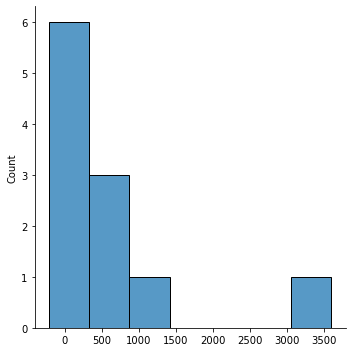

In [12]:
vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train[2]).T
print(vif)
sns.displot(residual)

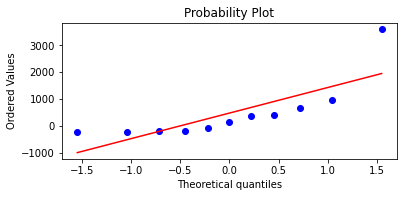

In [13]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

# Residual

[-216  660  152 -175  -82 -204 3599  961  411 -164  377]


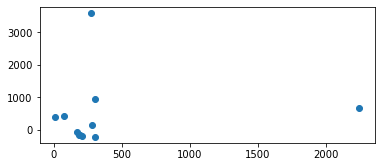

In [14]:
np.mean(residual)

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)


print(residual)